### Mempersiapkan data

Sebelum melakukan proses pelabelan, Kita  perlu melakukan proses data cleansing. Adapun tahapan data cleansing yang dilakukan adalah penghilangan nilai kosong, pembentukan nama variabel dari masing-masing kolom data, penyesuaian terhadap tipe data serta menyimpannya dalam sebuah file dataset baru dengan format .csv 

In [1]:
# Import library
import random
import pandas as pd
import numpy as np

In [2]:
# Membaca data mentah (raw data)
data = pd.read_csv('crx.data', header=None)

In [3]:
# Membentuk list Fitur A1..A17

varnames = ['A'+str(s) for s in range(1,17)]

# Men-set masing-masing kolom dari data yang ada
# Hal ini dilakukan karena data mentah yang dipakai tidak memiliki judul fitur
data.columns = varnames

# Mengganti data dengan nilai ? dengan nilai Nan
data = data.replace('?', np.nan)

In [4]:
# merubah tipe data dari kolom A2 dan A14 menjadi tipe float
data['A2'] = data['A2'].astype('float')
data['A14'] = data['A14'].astype('float')

In [5]:
#melakukan proses maping data text menjadi menjadi bentuk binary
data['A16'] = data['A16'].map({'+':1, '-':0})

In [6]:
#membuat list dengan fitur data dengan jenis kategori dan jenis numerik
cat_cols = [c for c in data.columns if data[c].dtypes=='O'] 
num_cols = [c for c in data.columns if data[c].dtypes!='O']

In [7]:
# melakukan inputasi terhadap data yang kosong dengan nilai 
# 0 untuk list data bernilai numerik
# Missing untuk data kolom fitur berjenis kategori
data[num_cols] = data[num_cols].fillna(0) 
data[cat_cols] = data[cat_cols].fillna('Missing')

#menyimpan data yang telah di transformasi dalam bentuk csv
data.to_csv('creditApprovalUCI.csv', index=False)


## Pelabelan Data menggunakan Teknik One-Hot Encoding

Teknik One-Hot Encoding mewakili variabel/fitur dengan jenis kategori sebagai sekelompok nilai biner, di mana setiap nilai biner ini mewakili satu kategori. 
Variabel biner menunjukkan apakah kategori tersebut ada dalam suatu pengamatan (1) atau tidak (0).


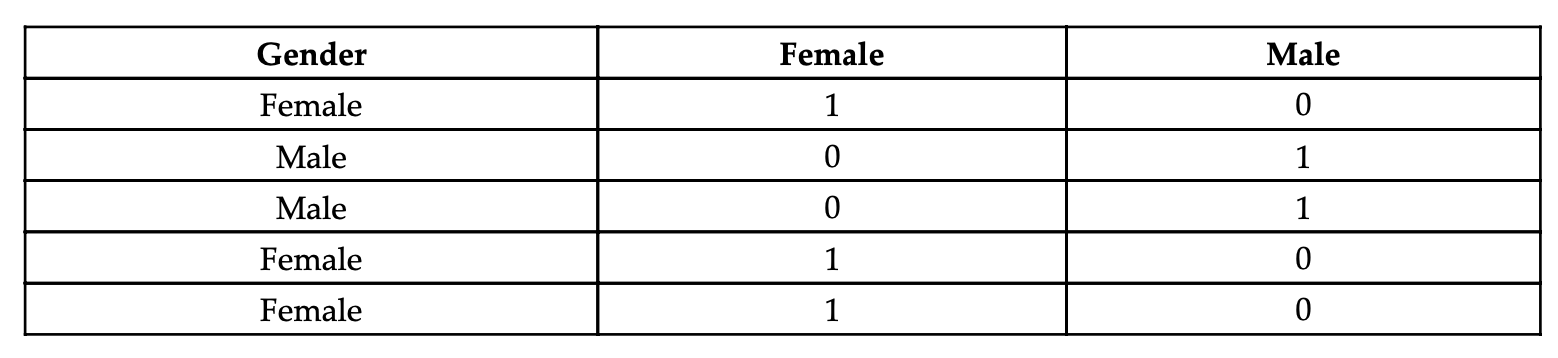
Berikut merupakan contoh bentuk hasil teknik one-hot-encoding untuk fitur jenis kelamin (gender)

Contoh lain pelabelan dengan dua kelas :  
Untuk variabel kategoris Warna dengan nilai merah, biru, dan hijau, kita dapat membuat tiga variabel yang disebut merah, biru, dan hijau. Variabel ini akan mengambil nilai 1 jika pengamatan masing-masing berwarna merah, biru, atau hijau, atau 0 sebaliknya.

Variabel kategori dengan k kategori unik dapat dikodekan dalam k-1 dalam variabel biner. Untuk Gender, k adalah 2 karena berisi dua label (pria dan wanita), oleh karena itu, kita hanya perlu membuat satu variabel biner (k - 1 = 1) untuk merekam semua informasi. Untuk variabel warna, yang memiliki tiga kategori (k=3; merah, biru, dan hijau), kita perlu membuat dua (k - 1 = 2) variabel biner untuk merekam semua informasi, sehingga dapat dirumuskan demikian:
'- Jika pengamatan berwarna merah, maka  variabel merah akan bernilai 1 (merah = 1, biru = 0). 
'- Jika pengamatan berwarna biru, maka variabel biru akan bernilai 1 (merah = 0, biru =1).
'- Jika pengamatan berwarna hijau, maka nilai kolom merah dan biru bernilai 0 (merah = 0, biru = 0).

In [8]:
### Pada sesi lab ini dibutuhkan library sklearn, silahkan anda melakukan instalasi dengan perintah berikut : 
### pip install sklearn
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder

In [9]:
# Membaca data yang telah di transformasi sebelumnya
data = pd.read_csv('creditApprovalUCI.csv')
data.head()

A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14  A15  A16
0  b  30.83  0.000  u  g  w  v  1.25  t   t    1   f   g  202.0    0    1
1  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g   43.0  560    1
2  a  24.50  0.500  u  g  q  h  1.50  t   f    0   f   g  280.0  824    1
3  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  100.0    3    1
4  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  120.0    0    1

In [10]:
# Memisahkan data yang akan digunakan sebagai testing ste
X_train, X_test, y_train, y_test = train_test_split( data.drop(labels=['A16'], axis=1), data['A16'], test_size=0.3,
random_state=0)

In [11]:
#Melakukan pengecekan nilai apa saja yang ada pada kolom A4
X_train['A4'].unique()

array(['u', 'y', 'Missing', 'l'], dtype=object)

Selanjutnya kita akan melakukan proses encoding pada kolom A4 menjadi nilai binary k-1. 
fungsi get_dummies() akan secara otomatis mengacuhkan nilai 'missing', 
jika Anda ingin memasukkan data 'missing' Anda dapat menambahkan parameter dummy_na=true pada perintah fungsi tersebut.
Perintah drop first digunakan untuk meminimalisir hasil kategori encoding dibentuk. 
Untuk referensi lebih lanjut Anda dapat membaca link berikut : https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [12]:
tmp = pd.get_dummies(X_train['A4'], drop_first=True) 

# Menampilkan 5 data awal dari hasil transformasi yang dilakukan
tmp.head()

l  u  y
596  0  1  0
303  0  1  0
204  0  0  1
351  0  0  1
118  0  1  0

In [13]:
# Untuk melakukan proses encoding data kategori secara bersamaan, pertama-tama kita membentuk list dari masing-masing
# kolom
vars_categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [14]:
# Melaukan encoding pada dataset training dan testing pada fitur / kolom yang telah di definisikan sebelumnya.
# Fungsi get_dummies() panda menangkap nama variabel, katakanlah, A1, 
# dan menempatkan garis bawah diikuti dengan nama kategori untuk mengidentifikasi variabel biner yang dihasilkan.
X_train_enc = pd.get_dummies(X_train[vars_categorical], drop_first=True)
X_test_enc = pd.get_dummies(X_test[vars_categorical], drop_first=True)

In [15]:
X_train_enc.head()

A1_a  A1_b  A4_l  A4_u  A4_y  A5_g  A5_gg  A5_p  A6_aa  A6_c  ...  A7_j  \
596     1     0     0     1     0     1      0     0      0     1  ...     0   
303     1     0     0     1     0     1      0     0      0     0  ...     0   
204     0     1     0     0     1     0      0     1      0     0  ...     0   
351     0     1     0     0     1     0      0     1      0     0  ...     0   
118     0     1     0     1     0     1      0     0      0     0  ...     0   

     A7_n  A7_o  A7_v  A7_z  A9_t  A10_t  A12_t  A13_p  A13_s  
596     0     0     1     0     1      1      1      0      0  
303     0     0     1     0     0      0      0      0      0  
204     0     0     1     0     1      1      0      0      0  
351     0     0     0     0     0      0      0      0      0  
118     0     0     1     0     1      1      1      0      0  

[5 rows x 36 columns]

Fungsi OneHotEncoder() Scikit-learn hanya akan mengkodekan kategori yang dipelajari dari data latih. 
Jika ada kategori baru dalam set pengujian, kita dapat menginstruksikan pembuat enkode untuk mengabaikannya atau mengembalikan kesalahan dengan argumen handle_unknown='ignore' atau
argumen handle_unknown='error' masing-masing.

In [16]:
## Melakukan proses encoding
encoder = OneHotEncoder(categories='auto', drop='first', sparse=False)

encoder.fit(X_train[vars_categorical])

OneHotEncoder(drop='first', sparse=False)

Selanjutnya, mari kita buat array NumPy dengan variabel biner untuk set train dan test:
Sayangnya, nama fitur tidak disimpan dalam array NumPy, oleh karena itu, mengidentifikasi fitur mana yang diturunkan dari variabel mana tidak mudah.

In [17]:
X_train_enc = encoder.transform(X_train[vars_categorical]) 
X_test_enc = encoder.transform(X_test[vars_categorical])


# Pembahasan
Pada notebook ini memuat dataset dan memisahkannya menjadi train dan test set menggunakan fungsi train_test_split() scikit-learn. 
Selanjutnya, kami menggunakan fungsi get_dummies() panda di
variabel A4, atur drop_first=True untuk membuang variabel biner pertama dan karenanya mendapatkan variabel biner k-1. Selanjutnya, kami menggunakan get_dummies() pada semua variabel kategoris dari kumpulan data, yang mengembalikan kerangka data dengan variabel biner yang mewakili kategori fitur yang berbeda.

Selanjutnya fungsi OneHotEncoder() dari scikit-learn, menyetel argumen kategori='auto' sehingga transformator mempelajari kategori yang akan dikodekan dari data latih; drop='first' sehingga transformator menjatuhkan variabel biner pertama, mengembalikan fitur biner k-1 per variabel kategori; dan sparse=False sehingga nilai dikembalikan dalam bentuk array NumPy (defaultnya adalah mengembalikan matriks sparse). 
Dengan metode fit(), OneHotEncoder() mempelajari kategori untuk dikodekan dari data latih dan dengan metode transform(), ia mengembalikan variabel biner dalam array NumPy.

Fungsi get_dummies() panda adalah ia mengembalikan nama fitur yang dengan jelas menunjukkan variabel mana dan kategori mana yang diwakili oleh setiap fitur. Pada sisi negatifnya, get_dummies() tidak mempertahankan informasi yang dipelajari dari data latih ke rangkaian pengujian. Sebaliknya, fungsi OneHotEncoder() scikit-learn dapat mempertahankan informasi dari data latih, tetapi mengembalikan array NumPy, di mana informasi tentang arti fitur hilang.


Proses One-hot-encoding memperluas ruang fitur. 9 variabel kategoris asli kemudian terekspansi menjadi 36 variabel biner.
Fungsi OneHotEncoder() Scikit-learn akan membuat indikator biner dari semua variabel/Fitur dalam data, jadi berhati-hatilah untuk tidak melewatkan variabel numerik saat memasang atau mengubah kumpulan data Anda.



# SKLEARN Feature-Engine

Kita dapat menggunakan Teknik one-hot-encoding dengan fungsi Feature-engine. Feature-engine memiliki banyak keuntungan:
pertama, 
memungkinkan kita untuk memilih variabel yang akan dikodekan secara langsung di transformator. 
Kedua, ia mengembalikan kerangka data pandas dengan nama variabel yang jelas, dan 
ketiga, ia mempertahankan informasi yang dipelajari dari rangkaian kereta, oleh karena itu mengembalikan jumlah kolom yang sama di rangkaian rangkaian kereta dan pengujian. Dengan itu, Feature-engine mengatasi keterbatasan
metode get_dummies() panda dan kelas OneHotEncoder() scikit-learn.
Untuk melakukan one-hot-encoding dengan Feature-engine, kami mengimpor panda, lalu memuat dan membagi data ke data latih dan pengujian seperti yang kami lakukan pada langkah 1 hingga langkah 3 dari demo awal. 


(ref : https://pypi.org/project/feature-engine/0.3.0/)
Selanjutnya, ikuti langkah-langkah ini:

In [ ]:
## jangan lupa melakukan instalasi feature_engine terlebih dahulu dengan perintah : pip install feature_engine dan pip install feature-engine==0.3.0

from feature_engine.categorical_encoders import OneHotCategoricalEncoder

In [ ]:
# set up encoder untuk membentuk nilai k-1
# Parameter top_categories=None, menunjukkan bahwa Anda akan melakukan encoding semua pada
# kategori yang ada dalam variabel kategori.
ohe_enc = OneHotCategoricalEncoder(top_categories=None,drop_last=True)

Feature-engine mendeteksi variabel kategori secara otomatis. Untuk mengkodekan hanya subset dari variabel kategori, kita dapat meneruskan nama variabel dalam daftar: ohe_enc = OneHotCategoricalEncoder(variables=['A1', 'A4']).

In [ ]:
# Implementasi encoder ke rlata latih sehingga ia mempelajari kategori dan variabel yang akan dikodekan:
ohe_enc.fit(X_train)

In [ ]:
X_train_enc = ohe_enc.transform(X_train) 
X_test_enc = ohe_enc.transform(X_test) 
X_train.head()

In [ ]:
X_train_enc.head()

### Hasil transformasi sama dengan proses encoding manual yang telah kita lakukan pada demo diatas